# Factor Analysis on Personality Traits Dataset

## Factor Analysis

Factor Analysis is an exploratory data analysis method to search for some hidden underlying factors (latent concepts) from a set of observed variables.


## Install the library for factor analsys

In [1]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 45.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=7617f81e4331c2fd67632ec99c91830e1480bd5aa7cd39512d23d3ca4e59c523
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


## Import the Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer

## Load Data 

In [3]:
df = pd.read_csv('bfi.csv')

In [4]:
df

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [5]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'gender', 'education', 'age'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2784 non-null   float64
 1   A2      2773 non-null   float64
 2   A3      2774 non-null   float64
 3   A4      2781 non-null   float64
 4   A5      2784 non-null   float64
 5   C1      2779 non-null   float64
 6   C2      2776 non-null   float64
 7   C3      2780 non-null   float64
 8   C4      2774 non-null   float64
 9   C5      2784 non-null   float64
 10  E1      2777 non-null   float64
 11  E2      2784 non-null   float64
 12  E3      2775 non-null   float64
 13  E4      2791 non-null   float64
 14  E5      2779 non-null   float64
 15  N1      2778 non-null   float64
 16  N2      2779 non-null   float64
 17  N3      2789 non-null   float64
 18  N4      2764 non-null   float64
 19  N5      2771 non-null   float64
 20  O1      2778 non-null   float64
 21  O2      2800 non-null   int64  
 22  

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,2784.0,2.413434,1.407737,1.0,1.0,2.0,3.0,6.0
A2,2773.0,4.802380,1.172020,1.0,4.0,5.0,6.0,6.0
A3,2774.0,4.603821,1.301834,1.0,4.0,5.0,6.0,6.0
A4,2781.0,4.699748,1.479633,1.0,4.0,5.0,6.0,6.0
A5,2784.0,4.560345,1.258512,1.0,4.0,5.0,5.0,6.0
C1,2779.0,4.502339,1.241347,1.0,4.0,5.0,5.0,6.0
C2,2776.0,4.369957,1.318347,1.0,4.0,5.0,5.0,6.0
C3,2780.0,4.303957,1.288552,1.0,4.0,5.0,5.0,6.0
C4,2774.0,2.553353,1.375118,1.0,1.0,2.0,4.0,6.0
C5,2784.0,3.296695,1.628542,1.0,2.0,3.0,5.0,6.0


## Drop the missing values

In [10]:
df.dropna(inplace=True)

In [12]:
df.shape

(2436, 25)

In [13]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


## Perform Adequecy Test

Before performing factor analysis, evaluate the factorability of the dataset.

#### Bartlett's Test

If this test is found to be statistically insignificant, we should not go for factor analysis.


In [18]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
test_stat, p_value = calculate_bartlett_sphericity(df)
test_stat, p_value

(18146.065577235022, 0.0)

from the value of p_value we see that the test is significant. So, we can go for factor analysis.

## Factor Analysis

In [19]:
fa = FactorAnalyzer(rotation=None)

fa.fit(df)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [22]:
factor_df = pd.DataFrame(fa.loadings_, index=df.columns, columns=['Factor-1', 'Factor-2', 'Factor-3'] )
factor_df

,Factor-1,Factor-2,Factor-3
A1,-0.217606,-0.018029,0.118049
A2,0.453104,0.273499,-0.153322
A3,0.522261,0.294670,-0.228919
A4,0.410902,0.116775,-0.093672
A5,0.580945,0.186043,-0.258511
C1,0.347189,0.141376,0.467374
C2,0.334666,0.199587,0.490544
C3,0.316649,0.059334,0.364027
C4,-0.467943,0.097701,-0.470003
C5,-0.489270,0.138189,-0.298092


In [23]:
# Check the Eigen values

ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

## Create a Scree Plot

PLot of the number of factors vs. the Eigen values.


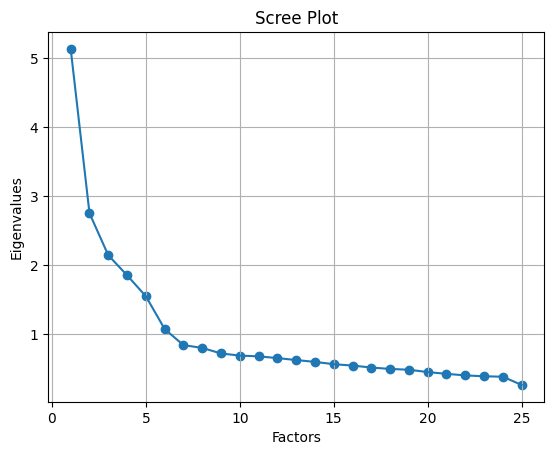

In [24]:

plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()



## Perform Factor Analysis with 6 factors to be derived



In [25]:
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [26]:
factor_df = pd.DataFrame(fa.loadings_, index=df.columns, columns=['Factor-1', 'Factor-2','Factor-3', 'Factor-4','Factor-5', 'Factor-6'])
factor_df

,Factor-1,Factor-2,Factor-3,Factor-4,Factor-5,Factor-6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


#### Factor-1 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)

#### Factor-x has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)

#### Factor-x has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)

#### Factor-xhas high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)

#### Factor-x has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
